# Drowsiness Detection from Labelled Recorded Videos Using Computer Vision 

## 1. Create Data PipeLine for Training

### 1.1 Import Dependencies

In [2]:
import pandas as pd
import os
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1.2 Read and Pre-process Labels

In [3]:
df = pd.read_csv("driver_imgs_list.csv")
df

classname            img
0            c0  img_44733.jpg
1            c0  img_72999.jpg
2            c0  img_25094.jpg
3            c0  img_69092.jpg
4            c0  img_92629.jpg
...         ...            ...
22419        c9  img_56936.jpg
22420        c9  img_46218.jpg
22421        c9  img_25946.jpg
22422        c9  img_67850.jpg
22423        c9   img_9684.jpg

[22424 rows x 2 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   classname  22424 non-null  object
 1   img        22424 non-null  object
dtypes: object(2)
memory usage: 350.5+ KB


In [5]:
df.columns

Index(['classname', 'img'], dtype='object')

In [6]:
maps = {"c0": "safe driving",
"c1": "texting - right",
"c2": "talking on the phone - right",
"c3": "texting - left",
"c4": "talking on the phone - left",
"c5": "operating the radio",
"c6": "drinking",
"c7": "reaching behind",
"c8": "hair and makeup",
"c9": "talking to passenger"}

In [7]:
df["target"] = df["classname"].map(maps)
df

classname            img                target
0            c0  img_44733.jpg          safe driving
1            c0  img_72999.jpg          safe driving
2            c0  img_25094.jpg          safe driving
3            c0  img_69092.jpg          safe driving
4            c0  img_92629.jpg          safe driving
...         ...            ...                   ...
22419        c9  img_56936.jpg  talking to passenger
22420        c9  img_46218.jpg  talking to passenger
22421        c9  img_25946.jpg  talking to passenger
22422        c9  img_67850.jpg  talking to passenger
22423        c9   img_9684.jpg  talking to passenger

[22424 rows x 3 columns]

In [14]:
df["source_path"] = "imgs/train/"+df["classname"]+"/"+df["img"]
df

classname            img                target  \
0            c0  img_44733.jpg          safe driving   
1            c0  img_72999.jpg          safe driving   
2            c0  img_25094.jpg          safe driving   
3            c0  img_69092.jpg          safe driving   
4            c0  img_92629.jpg          safe driving   
...         ...            ...                   ...   
22419        c9  img_56936.jpg  talking to passenger   
22420        c9  img_46218.jpg  talking to passenger   
22421        c9  img_25946.jpg  talking to passenger   
22422        c9  img_67850.jpg  talking to passenger   
22423        c9   img_9684.jpg  talking to passenger   

                       source_path  
0      imgs/train/c0/img_44733.jpg  
1      imgs/train/c0/img_72999.jpg  
2      imgs/train/c0/img_25094.jpg  
3      imgs/train/c0/img_69092.jpg  
4      imgs/train/c0/img_92629.jpg  
...                            ...  
22419  imgs/train/c9/img_56936.jpg  
22420  imgs/train/c9/img_46218.jpg  
22421  imgs/train/c9/img_25946.jpg  
22422  imgs/train/c9/img_67850.jpg  
22423   imgs/train/c9/img_9684.jpg  

[22424 rows x 4 columns]

In [12]:
targets = pd.get_dummies(df['target'], dtype=int)
targets

drinking  hair and makeup  operating the radio  reaching behind  \
0             0                0                    0                0   
1             0                0                    0                0   
2             0                0                    0                0   
3             0                0                    0                0   
4             0                0                    0                0   
...         ...              ...                  ...              ...   
22419         0                0                    0                0   
22420         0                0                    0                0   
22421         0                0                    0                0   
22422         0                0                    0                0   
22423         0                0                    0                0   

       safe driving  talking on the phone - left  \
0                 1                            0   
1                 1                            0   
2                 1                            0   
3                 1                            0   
4                 1                            0   
...             ...                          ...   
22419             0                            0   
22420             0                            0   
22421             0                            0   
22422             0                            0   
22423             0                            0   

       talking on the phone - right  talking to passenger  texting - left  \
0                                 0                     0               0   
1                                 0                     0               0   
2                                 0                     0               0   
3                                 0                     0               0   
4                                 0                     0               0   
...                             ...                   ...             ...   
22419                             0                     1               0   
22420                             0                     1               0   
22421                             0                     1               0   
22422                             0                     1               0   
22423                             0                     1               0   

       texting - right  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
22419                0  
22420                0  
22421                0  
22422                0  
22423                0  

[22424 rows x 10 columns]

In [14]:
map_back = {k:v for k,v in enumerate(targets.columns)}
map_back

{0: 'drinking',
 1: 'hair and makeup',
 2: 'operating the radio',
 3: 'reaching behind',
 4: 'safe driving',
 5: 'talking on the phone - left',
 6: 'talking on the phone - right',
 7: 'talking to passenger',
 8: 'texting - left',
 9: 'texting - right'}

<Axes: >

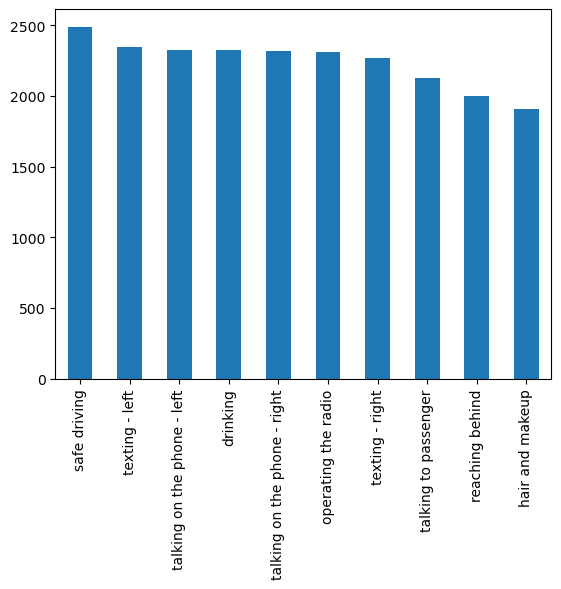

In [15]:
df["target"].value_counts().plot(kind='bar')

In [16]:
paths = df["source_path"]

### 1.3 Image Processing Functions

In [17]:
H = 256
W = 256
def process_one_frameid(path):
    frame = tf.image.decode_png(tf.io.read_file(path))
    frame = tf.image.resize(frame, (H, W))/255 # Reshape and scale for faster processing
    return frame.numpy()

In [15]:
df["source_path"][0]

'imgs/train/c0/img_44733.jpg'

In [19]:
x = process_one_frameid(df["source_path"][0])

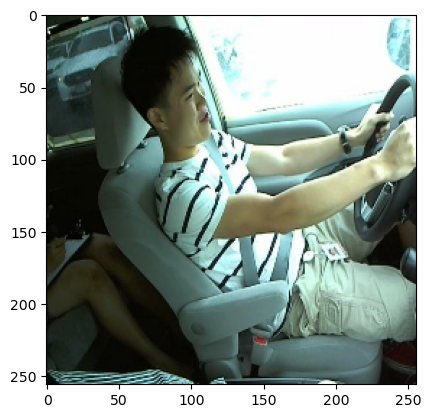

In [20]:
plt.imshow(x)

### 1.4 Split into Train-Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df["source_path"].values, targets.values, test_size=0.2, stratify=targets)

In [17]:
X_train.shape

(17939,)

In [18]:
X_train

array(['imgs/train/c0/img_92742.jpg', 'imgs/train/c1/img_90351.jpg',
       'imgs/train/c3/img_28087.jpg', ..., 'imgs/train/c4/img_36036.jpg',
       'imgs/train/c3/img_86411.jpg', 'imgs/train/c1/img_63767.jpg'],
      dtype=object)

In [24]:
x = process_one_frameid(X_train[0])

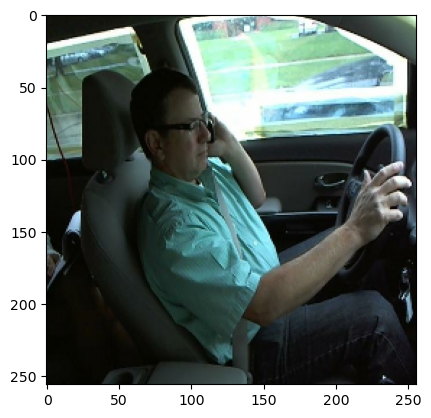

In [25]:
plt.imshow(x)

In [26]:
y_train[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [27]:
def decode_output(single_output):
    single_output = np.array(single_output).argmax()
    return targets.columns[single_output]

In [28]:
decode_output(y_train[0])

'talking on the phone - left'

### 1.5 Define Dataset Object for Large Volume Data

In [29]:
# Train dataset
x = tf.data.Dataset.from_tensor_slices(X_train)
x = x.map(lambda window : tf.numpy_function(process_one_frameid, [window], tf.float32))
y = tf.data.Dataset.from_tensor_slices(y_train)
dataset = tf.data.Dataset.zip((x,y))
dataset = dataset.batch(32)
dataset = dataset.prefetch(64)

In [30]:
batch = dataset.take(1)

In [31]:
x,y = batch.as_numpy_iterator().next()

In [32]:
x.shape

(32, 256, 256, 3)

In [33]:
y.shape

(32, 10)

In [34]:
X_test.shape

(4485,)

In [35]:
# Validation or Test Dataset
valx = tf.data.Dataset.from_tensor_slices(X_test)
valx = valx.map(lambda window : tf.numpy_function(process_one_frameid, [window], tf.float32))
valy = tf.data.Dataset.from_tensor_slices(y_test)
valdataset = tf.data.Dataset.zip((valx,valy))
valdataset = valdataset.batch(32)

In [36]:
i,o = dataset.as_numpy_iterator().next()

In [37]:
i.shape # face # (batch, height, weight, channels)

(32, 256, 256, 3)

In [38]:
o.shape # batch, outputs

(32, 10)

## 2. Model using functional API of keras using 2D CNN for image Classification

### 2.1 Import Dependencies

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, TimeDistributed, MaxPooling2D, concatenate, Conv3D, MaxPooling3D, Add
from tensorflow.keras.models import Model, Sequential
import shutil

### 2.2 Connect to GPU

In [40]:
strategy = tf.distribute.MirroredStrategy()

### 2.3 Define the Model

In [41]:
with strategy.scope():
    image = Input(shape=(H, W, 3), name='input')
    one_frame_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(H,W,3))
    one_frame_model.trainable=False
    features = one_frame_model(image)
    features = MaxPooling2D(8)(features)
    flat = Flatten()(features)
    dense = Dense(256, activation='relu')(flat)
    dense = Dense(128, activation='relu')(dense)
    dense = Dense(128, activation='relu')(dense)
    dense = Dense(64, activation='relu')(dense)

    output = Dense(targets.shape[1], activation='softmax')(dense) # 10 classes found in this dataset
    model = Model(image, output)
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')])

9406464/9406464 [==============================] - 0s 0us/step


### 2.4 Display Model and Model Summary

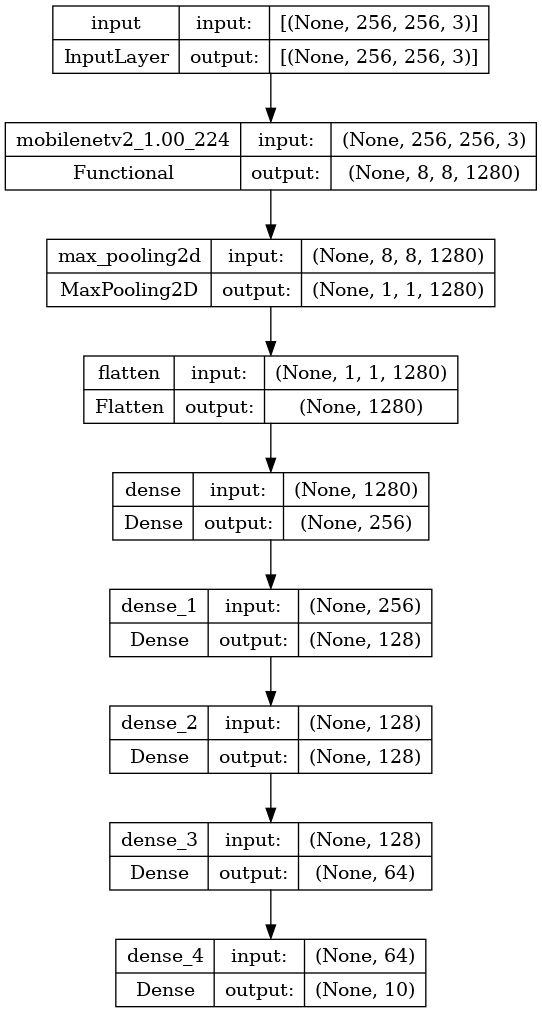

In [42]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [43]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 256, 256, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 1280)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dense_1 (Dense)             (None, 128)               32896 

### 2.5 Create Logs Directory for TensorBoard

In [44]:
try:
    shutil.rmtree("./logs")
except:
    pass
os.mkdir("./logs")

In [45]:
tfboard = tf.keras.callbacks.TensorBoard("./logs")
model_check = tf.keras.callbacks.ModelCheckpoint("./model.h5", save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max')

### 2.6 Train the Model

In [46]:
model.fit(dataset, epochs=100, validation_data=valdataset, callbacks=[tfboard, model_check])

Epoch 1/100
561/561 [==============================] - 264s 436ms/step - loss: 2.3153 - accuracy: 0.1796 - precision: 0.1897 - recall: 0.0021 - val_loss: 2.0743 - val_accuracy: 0.2707 - val_precision: 0.5000 - val_recall: 2.2297e-04
Epoch 2/100
561/561 [==============================] - 165s 295ms/step - loss: 1.8982 - accuracy: 0.3730 - precision: 0.8500 - recall: 0.0114 - val_loss: 1.7481 - val_accuracy: 0.4448 - val_precision: 0.9389 - val_recall: 0.0274
Epoch 3/100
561/561 [==============================] - 155s 276ms/step - loss: 1.5636 - accuracy: 0.5272 - precision: 0.9171 - recall: 0.0857 - val_loss: 1.4144 - val_accuracy: 0.5781 - val_precision: 0.9161 - val_recall: 0.1559
Epoch 4/100
561/561 [==============================] - 153s 273ms/step - loss: 1.2510 - accuracy: 0.6461 - precision: 0.9224 - recall: 0.2427 - val_loss: 1.1329 - val_accuracy: 0.6776 - val_precision: 0.9262 - val_recall: 0.3331
Epoch 5/100
561/561 [==============================] - 154s 275ms/step - loss: 0

KeyboardInterrupt: 

### 2.6 Save and Plot History of Loss and Metrics

In [47]:
hist = pd.DataFrame(model.history.history)

In [48]:
hist

loss  accuracy  precision    recall  val_loss  val_accuracy  \
0   2.315288  0.179553   0.189744  0.002063  2.074300      0.270680   
1   1.898178  0.372986   0.850000  0.011372  1.748079      0.444816   
2   1.563593  0.527175   0.917114  0.085735  1.414445      0.578149   
3   1.250982  0.646078   0.922441  0.242656  1.132928      0.677592   
4   0.998160  0.726964   0.924227  0.416801  0.920478      0.746488   
5   0.809847  0.784102   0.929505  0.563019  0.762211      0.796656   
6   0.669706  0.826635   0.936275  0.665868  0.644828      0.826310   
7   0.566022  0.853559   0.940414  0.736384  0.557613      0.845931   
8   0.486354  0.876024   0.945256  0.786387  0.488742      0.865775   
9   0.423297  0.892636   0.949572  0.821896  0.434986      0.880045   
10  0.372941  0.907631   0.954531  0.849601  0.390868      0.893200   
11  0.331124  0.920062   0.958272  0.870506  0.353982      0.904348   
12  0.296109  0.928034   0.961413  0.887508  0.323386      0.912598   
13  0.266226  0.936396   0.964892  0.902391  0.297228      0.922631   
14  0.240728  0.943921   0.967329  0.914376  0.274513      0.927982   
15  0.218527  0.950164   0.970585  0.925191  0.255608      0.932218   
16  0.199123  0.954624   0.972643  0.933497  0.239109      0.936455   
17  0.181903  0.959028   0.975205  0.940576  0.223875      0.939799   
18  0.166533  0.962930   0.977335  0.947098  0.210584      0.943144   
19  0.152725  0.966275   0.978862  0.952561  0.198898      0.948049   
20  0.140375  0.969006   0.980287  0.956352  0.188701      0.949610   
21  0.129151  0.971905   0.982554  0.960700  0.179404      0.953400   
22  0.118920  0.974413   0.984015  0.964268  0.170938      0.954738   
23  0.109728  0.977256   0.985857  0.967557  0.163216      0.957637   
24  0.101337  0.979486   0.986851  0.970623  0.156414      0.958751   
25  0.093560  0.981214   0.988456  0.973744  0.150175      0.960089   
26  0.086403  0.983054   0.989495  0.976643  0.144434      0.962319   
27  0.079827  0.984726   0.990638  0.979152  0.139403      0.963880   
28  0.073720  0.986231   0.991604  0.980991  0.134449      0.964103   
29  0.068197  0.987680   0.992623  0.982663  0.129831      0.965217   
30  0.063044  0.988963   0.993418  0.984336  0.125594      0.966332   
31  0.058202  0.990022   0.994376  0.985562  0.121992      0.967224   
32  0.053703  0.991192   0.995226  0.987736  0.118572      0.967447   
33  0.049615  0.992474   0.995792  0.989409  0.115030      0.967670   
34  0.045664  0.993534   0.996523  0.990635  0.112055      0.967447   
35  0.042015  0.994649   0.997141  0.991694  0.108998      0.967893   

    val_precision  val_recall  
0        0.500000    0.000223  
1        0.938931    0.027425  
2        0.916121    0.155853  
3        0.926224    0.333110  
4        0.919617    0.492308  
5        0.926550    0.613155  
6        0.928055    0.687402  
7        0.930447    0.742698  
8        0.934435    0.781717  
9        0.936602    0.813601  
10       0.940720    0.838573  
11       0.943721    0.856187  
12       0.947610    0.875139  
13       0.951196    0.886511  
14       0.954912    0.897213  
15       0.956368    0.904125  
16       0.959203    0.912152  
17       0.962401    0.918841  
18       0.964569    0.922631  
19       0.966357    0.928651  
20       0.967667    0.934225  
21       0.968901    0.937793  
22       0.969662    0.940691  
23       0.969280    0.942698  
24       0.969178    0.946488  
25       0.971024    0.948941  
26       0.970903    0.952285  
27       0.971630    0.954515  
28       0.971895    0.956076  
29       0.972832    0.958082  
30       0.973303    0.959197  
31       0.973762    0.959866  
32       0.973571    0.960981  
33       0.974052    0.962542  
34       0.973423    0.963657  
35       0.974324    0.964548

In [49]:
hist.to_csv("hist.csv")

<Axes: >

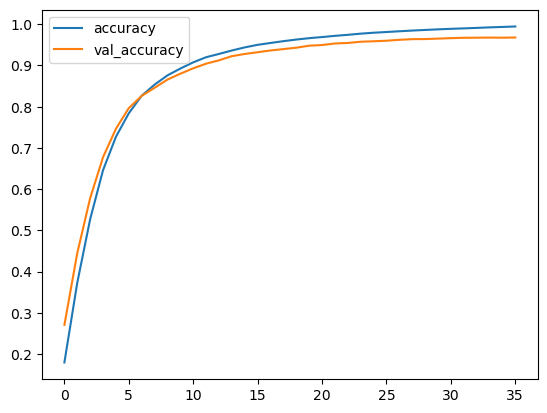

In [50]:
hist[["accuracy", "val_accuracy"]].plot()

<Axes: >

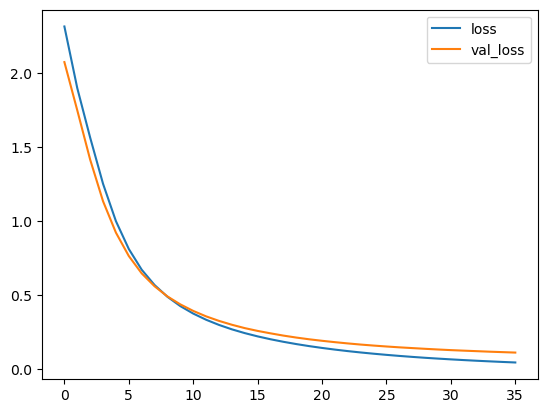

In [54]:
hist[['loss', 'val_loss']].plot()

<Axes: >

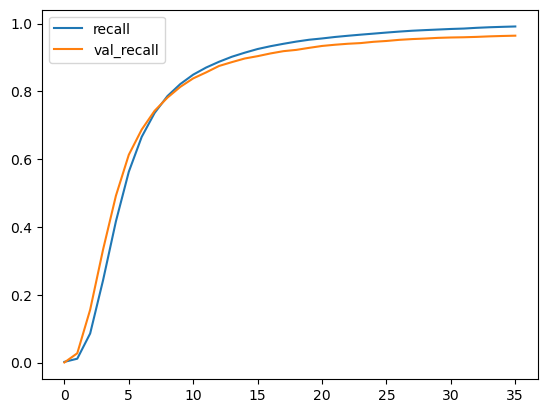

In [55]:
hist[['recall', 'val_recall']].plot()

## 3. Test On Actual Data

### 3.1 Load the Best Model

In [114]:
bestm = tf.keras.models.load_model("model.h5")

### 3.2 Get Random Test Images

In [121]:
test_images = glob.glob("imgs/test/*/*")

In [122]:
def getidx(name):
    name = name.split("/")[-1]
    name = name.split("_")[1].split(".")[0]
    return int(name)

In [123]:
sorted_images = sorted(test_images, key=getidx)

### 3.3 Preprocess those and Predict

1/1 [==============================] - 0s 33ms/step


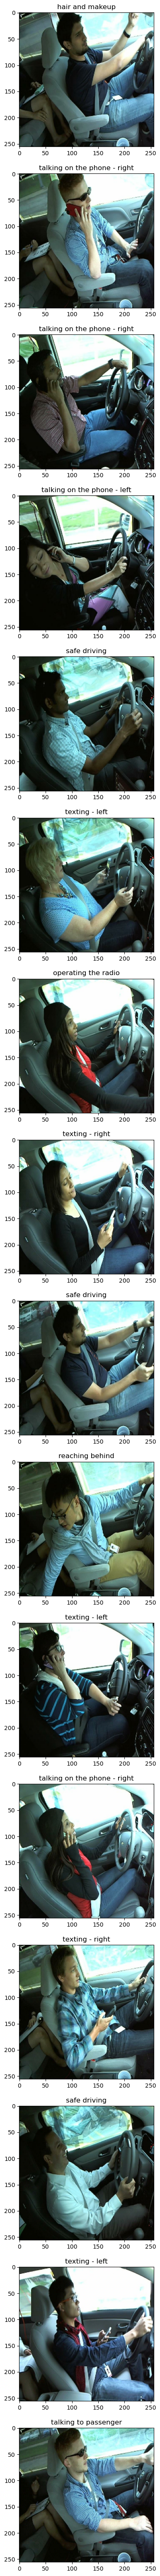

In [124]:
n_cases = 16
test_cases = np.random.choice(sorted_images, n_cases)
test_x = np.array([process_one_frameid(x) for x in test_cases])
prediction = bestm.predict(test_x)
y = [map_back[i] for i in prediction.argmax(-1)]
fig,ax = plt.subplots(n_cases, figsize=(5,5*n_cases))
for i in range(n_cases):
    ax[i].imshow(test_x[i])
    ax[i].set_title(y[i])

In [112]:
prediction.argmax(-1)

array([5, 4, 2, 5, 2, 1, 6, 1, 1, 3, 7, 7, 3, 6, 2, 0])